# Load data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("creditcard.csv")

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35742 entries, 0 to 35741
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    35742 non-null  int64  
 1   V1      35742 non-null  float64
 2   V2      35742 non-null  float64
 3   V3      35742 non-null  float64
 4   V4      35742 non-null  float64
 5   V5      35742 non-null  float64
 6   V6      35741 non-null  float64
 7   V7      35741 non-null  float64
 8   V8      35741 non-null  float64
 9   V9      35741 non-null  float64
 10  V10     35741 non-null  float64
 11  V11     35741 non-null  float64
 12  V12     35741 non-null  float64
 13  V13     35741 non-null  float64
 14  V14     35741 non-null  float64
 15  V15     35741 non-null  float64
 16  V16     35741 non-null  float64
 17  V17     35741 non-null  float64
 18  V18     35741 non-null  float64
 19  V19     35741 non-null  float64
 20  V20     35741 non-null  float64
 21  V21     35741 non-null  float64
 22

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,35742.000000,35742.000000,35742.000000,35742.000000,35742.000000,35742.000000,35741.000000,35741.000000,35741.000000,35741.000000,...,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000
mean,23997.300823,-0.208427,0.072579,0.718292,0.195733,-0.216686,0.095575,-0.116847,0.032755,0.259459,...,-0.030876,-0.113555,-0.041571,0.007469,0.135958,0.021813,0.010836,0.003834,84.203356,0.002882
std,12423.654094,1.836736,1.540565,1.540896,1.409063,1.388746,1.310633,1.257788,1.242285,1.238161,...,0.769829,0.640398,0.545241,0.593343,0.435886,0.506559,0.388306,0.302016,227.279858,0.053606
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,12283.500000,-0.960139,-0.499301,0.244741,-0.714475,-0.818199,-0.644998,-0.598057,-0.155602,-0.523422,...,-0.239644,-0.536461,-0.178485,-0.326932,-0.127310,-0.331727,-0.063200,-0.007248,6.990000,0.000000
50%,28992.000000,-0.234480,0.114024,0.827554,0.188607,-0.255034,-0.163054,-0.073069,0.043456,0.135169,...,-0.081611,-0.087516,-0.051996,0.061818,0.175722,-0.063275,0.008848,0.021087,22.000000,0.000000
75%,34258.000000,1.162263,0.755015,1.456358,1.078531,0.302991,0.485169,0.436560,0.307599,0.991696,...,0.094995,0.296665,0.076214,0.398791,0.421085,0.301153,0.086772,0.076006,76.000000,0.000000
max,38241.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


The data represents credit card transactions that occurred over two days in September 2013 by European cardholders.
V1-V28 represent features that maybe were obtained using a PCA approach. This is also a common practise due to privacy reasons. Imagine having private data, at least in theory, the data must be hashed.

Feature **Time** contains the seconds elapsed between each transaction and the first transaction in the dataset.

The feature **Amount** is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

Feature **Class** is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [5]:
# let's check correlation between features


<Axes: >

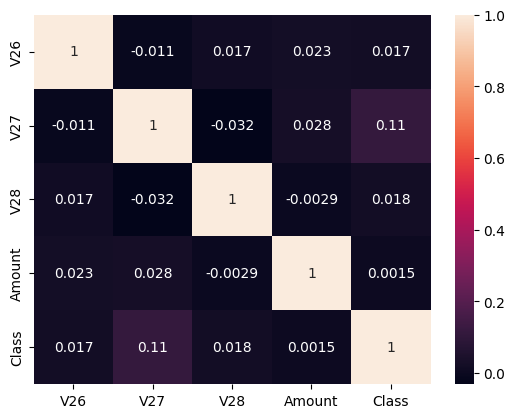

In [6]:
import seaborn as sns

Var_Corr = df[df.columns[-5:]].corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
# Not a huge help because we have a lot of features

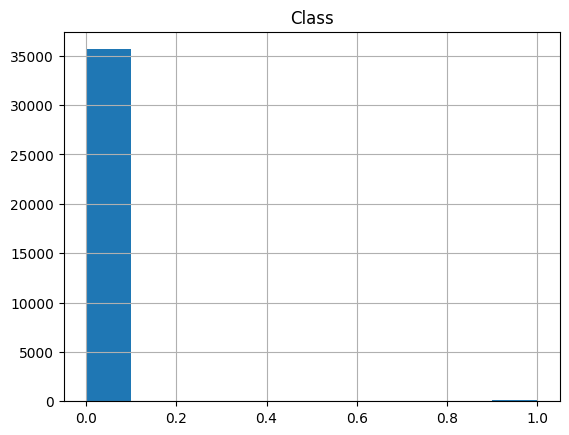

In [7]:
# let's check class imbalance
values = df[["Class"]].hist()

In [8]:
df = df.dropna()

In [9]:
import numpy as np
values = np.histogram(df[["Class"]], bins=2)
max_ratio = values[0][0] / values[0][1]
print(f"ratio {max_ratio}:1")
print(f"majority class has {(values[0][0] / sum(values[0]))*100} %")


ratio 346.0:1
majority class has 99.71181556195965 %


Given the above plot we have a huge imbalance dataset. With a ratio of 578 : 1, with the majority class having 99.83 this means that if we opt by a random model we would have a accuracy of 99.83. So this our new baseline :)  

# Data Preprocessing

Since our dataset does not have missing data we do not need to fill.

# Data engineering

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,...,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000
mean,23996.902297,-0.208426,0.072574,0.718282,0.195747,-0.216692,0.095575,-0.116847,0.032755,0.259459,...,-0.030876,-0.113555,-0.041571,0.007469,0.135958,0.021813,0.010836,0.003834,84.203356,0.002882
std,12423.599433,1.836762,1.540586,1.540916,1.409080,1.388765,1.310633,1.257788,1.242285,1.238161,...,0.769829,0.640398,0.545241,0.593343,0.435886,0.506559,0.388306,0.302016,227.279858,0.053606
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,12283.000000,-0.960227,-0.499337,0.244735,-0.714486,-0.818210,-0.644998,-0.598057,-0.155602,-0.523422,...,-0.239644,-0.536461,-0.178485,-0.326932,-0.127310,-0.331727,-0.063200,-0.007248,6.990000,0.000000
50%,28990.000000,-0.234549,0.113970,0.827531,0.188768,-0.255049,-0.163054,-0.073069,0.043456,0.135169,...,-0.081611,-0.087516,-0.051996,0.061818,0.175722,-0.063275,0.008848,0.021087,22.000000,0.000000
75%,34258.000000,1.162263,0.755027,1.456378,1.078566,0.302996,0.485169,0.436560,0.307599,0.991696,...,0.094995,0.296665,0.076214,0.398791,0.421085,0.301153,0.086772,0.076006,76.000000,0.000000
max,38241.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


In [11]:
# Let's plot Time to understand better the distribution

# since time is dependent on the previous row we need to remove that feature
df.drop("Time", axis=1, inplace=True)

In [12]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'Amount'}>]], dtype=object)

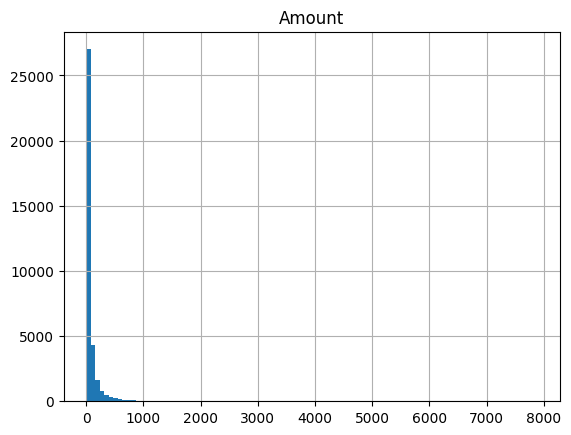

In [13]:
df[["Amount"]].hist(bins=100)

From the above plot we can conclude that we have a very skewd dataset.

<Axes: >

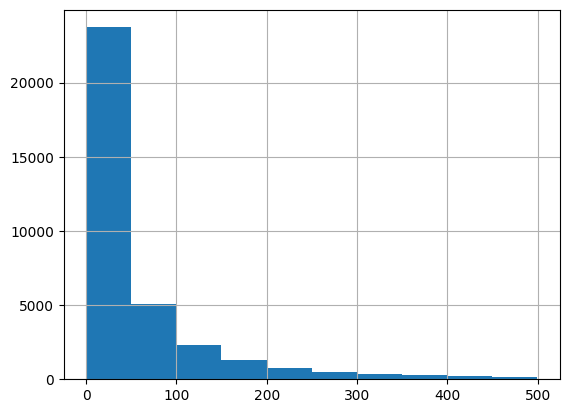

In [14]:
df[df["Amount"] < 500]["Amount"].hist()

Even by plot just transaction below 500 we confirm our thesis of having a very skew dataset

In [15]:
df["AmountBand"] = pd.cut(df["Amount"], 200)

In [16]:
df["AmountBand"].value_counts()

(-7.879, 39.397]        21982
(39.397, 78.794]         5023
(78.794, 118.191]        2858
(118.191, 157.588]       1471
(157.588, 196.986]        964
                        ...  
(4845.843, 4885.24]         0
(4806.446, 4845.843]        0
(4767.049, 4806.446]        0
(4727.652, 4767.049]        0
(3939.71, 3979.107]         0
Name: AmountBand, Length: 200, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
df["AmountBand"] = le.fit_transform(df["AmountBand"])

In [19]:
# S
max(df.AmountBand)
# Since we have 67 bands, we should normalize the dataset, because dependning on the dataset, the real value of the data may affect

94

# Split dataset

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y = df["Class"]

In [22]:
X = df.drop(["Amount", "Class"], axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
y_train.value_counts()

0.0    23881
1.0       65
Name: Class, dtype: int64

# Apply Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
RF_clf = RandomForestClassifier()

In [27]:
model = RF_clf.fit(X_train, y_train)

In [28]:
preds = model.predict(X_test)

In [29]:
# Let's check results

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11757
         1.0       0.94      0.89      0.92        38

    accuracy                           1.00     11795
   macro avg       0.97      0.95      0.96     11795
weighted avg       1.00      1.00      1.00     11795



Here, since we are in a fraud situation, what we are really converned is about recall, because we need to maximize the fraud cases that we find

# Let's apply several tecniques to improve the imbalance situation

In [32]:
from imblearn.under_sampling import RandomUnderSampler

In [33]:
random_under_sampler = RandomUnderSampler()

In [35]:
X_under, y_under = random_under_sampler.fit_resample(X_train, y_train)

In [36]:
model = RF_clf.fit(X_under, y_under)

In [37]:
preds = model.predict(X_test)

In [38]:
# Let's check results

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11757
         1.0       0.43      0.92      0.58        38

    accuracy                           1.00     11795
   macro avg       0.71      0.96      0.79     11795
weighted avg       1.00      1.00      1.00     11795

